### Image Derivatives

$\frac{df}{dx} = lim_{\Delta{x} \rightarrow 0} \frac{f(x) - f(x - \Delta{x})}{\Delta{x}}$ = $f^{'}(x) = f_{x}$

$\frac{df}{dx} = f(x) - f(x-1) = f^{'}(x) \longrightarrow$ Backward difference

$\frac{df}{dx} = f(x) - f(x+1) = f^{'}(x) \longrightarrow$ Forward difference

$\frac{df}{dx} = f(x+1) - f(x-1) = f^{'}(x) \longrightarrow$ Central difference


Backward difference Mask $\longrightarrow$ $ [1, -1]$  <br>
Forward difference Mask $\longrightarrow$ $[1, -1]$  <br>
Central difference Mask $\longrightarrow$ $[-1, 0, 1]$ <br>


### Image Filtering Methods
1. Spatial Domain <br>
    a. Point Processing Methods <br>
    b. Area or mask Processing Methods
2. Frequency Domain
    

##### 1.a. Point Processing Methods 


##### Brightness

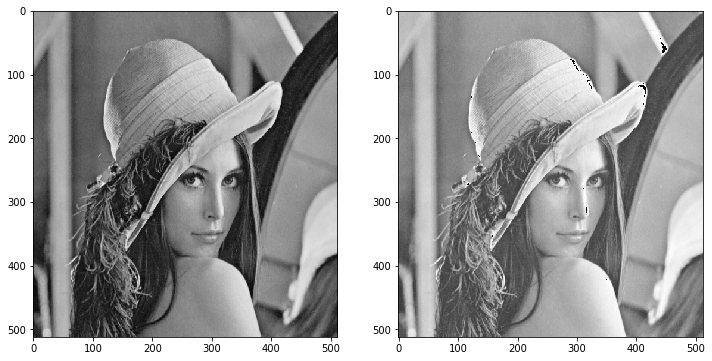

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

img = cv2.imread('images/lena.jpg', 0)
trans_img = img + 30
axes[0].imshow(img, aspect='auto', cmap="gray")
axes[1].imshow(trans_img, aspect='auto', cmap="gray")

##### Contrast

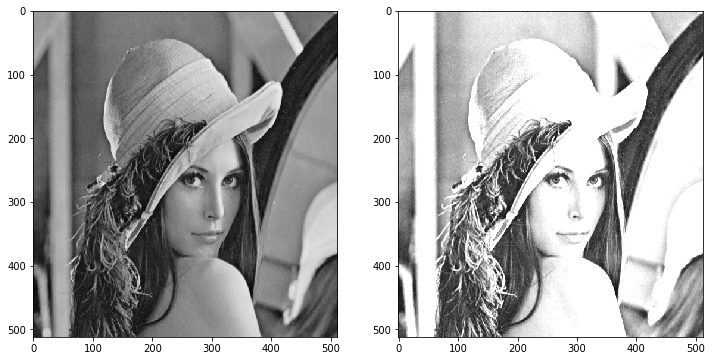

In [2]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

img = cv2.imread('images/lena.jpg', 0)
trans_img = img * 1.8       # > 1 for more contrast and < 1 for low contrast 
trans_img = np.where(trans_img[:]> 255, 255, trans_img)
trans_img = np.where(trans_img[:]< 0, 0, trans_img)
trans_img = np.ceil(trans_img).astype(int)
axes[0].imshow(img, aspect='auto', cmap="gray")
axes[1].imshow(trans_img, aspect='auto', cmap="gray")

#### Thresholding 

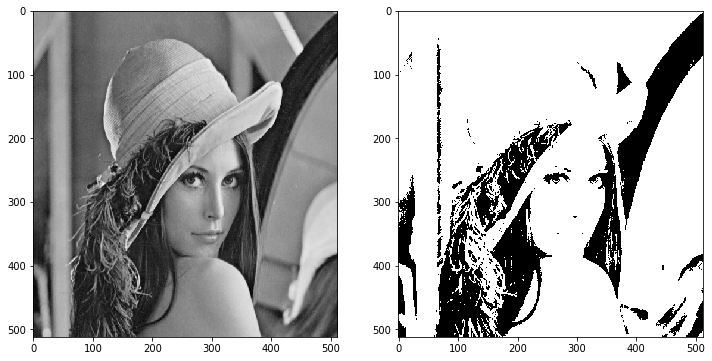

In [3]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

img = cv2.imread('images/lena.jpg', 0)
trans_img = np.where(img[:]> 80, 1, 0)
axes[0].imshow(img, aspect='auto', cmap="gray")
axes[1].imshow(trans_img, aspect='auto', cmap="gray")

#### Negative 

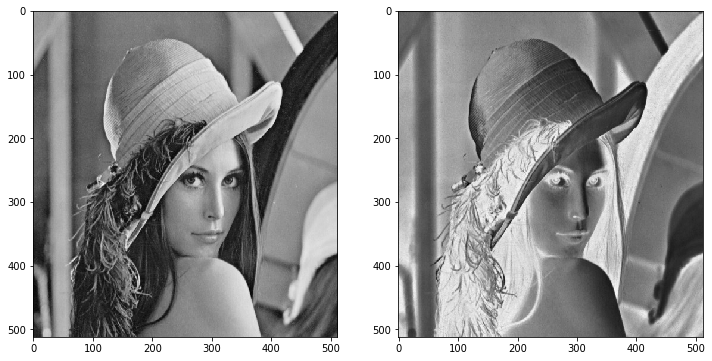

In [4]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

img = cv2.imread('images/lena.jpg', 0)
trans_img = 255 - img 
axes[0].imshow(img, aspect='auto', cmap="gray")
axes[1].imshow(trans_img, aspect='auto', cmap="gray")

#### Histogram & Histogram Equalization 

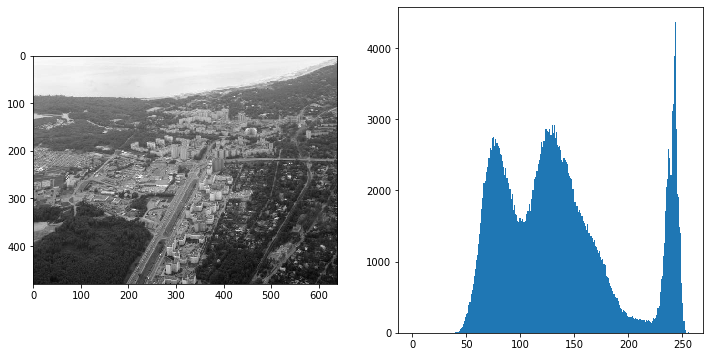

In [4]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
img = cv2.imread('images/aero3.jpg', 0)

axes[0].imshow(img, cmap="gray")
axes[1].hist(img.ravel(), 256, [0, 256])
plt.show()

#### Histogram Equalization formula 

$h(v) = round \big( \frac{cdf(v) - cdf_{min}}{(M*N) - cdf_{min}} *(L-1))$

$cdf(v) = \sum P(i)$ <br>
<br>
$P(i) = n_{i}/n$ <br>
$n_i \rightarrow \text{number of pixels with intensity i}$<br>
$n \rightarrow \text{total number of pixels} $

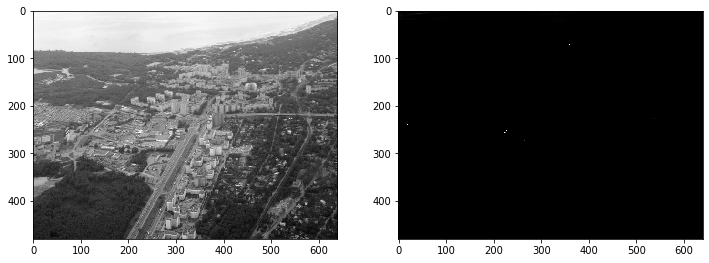

In [39]:
## Todo 
### Implemenation is not correct 

import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

img = cv2.imread('images/aero3.jpg', 0)
# cdf 
flat_img = img.ravel()
total_pixels = len(flat_img)
L = 256

# Todo

axes[0].imshow(img, cmap="gray")
axes[1].imshow(equilised_hist, cmap="gray")

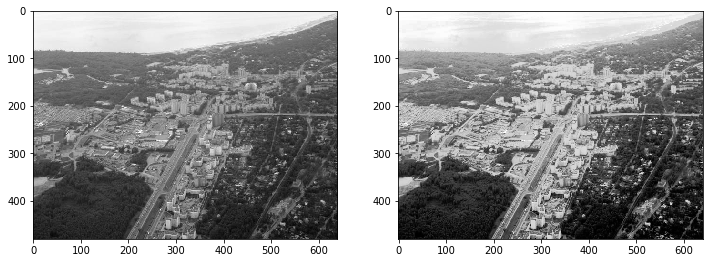

In [36]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

img = cv2.imread('images/aero3.jpg', 0)
# cdf 
flat_img = img.ravel()
total_pixels = len(flat_img)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf = 255 * cdf / cdf[-1] # normalize

# use linear interpolation of cdf to find new pixel values
equilised_hist = np.interp(img.flatten(), bins[:-1], cdf)

equilised_hist = np.array(equilised_hist, dtype=float)
equilised_hist = equilised_hist.reshape(img.shape[0], img.shape[1])
axes[0].imshow(img, cmap="gray")
axes[1].imshow(equilised_hist, cmap="gray")

### 1.b. Area or Mask processing Methods


Linear filters <br>
Blurring <br>
Sharpenning <br>
Averaging <br>
Gaussian smoothing <br>
Median filter <br>

Salt and Pepper Noise <br>
Impulse Noise <br>
Gaussian Noise <br>


In [ ]:
### Blurring can be achieved through following filter 
## Mean filter  also known as box filter or average filter 
## Weighted average filter 
## Gaussian filter 

### Gaussian Kernel 

In [20]:
import numpy as np 

def gaussian_2d_kernel(shape=(3,3), sigma=0.5):
    m, n = (shape[0]-1)/2, (shape[1]-1)/2
    y, x = np.ogrid[-m:m+1,-n:n+1]
    mask = np.exp(-(x**2 + y**2) / (2*sigma**2))
    total = mask.sum()
    if total != 0:
        mask_normalised = mask/total
    return mask_normalised

### LoG Kernel

In [45]:
def log_kernel(shape=(3,3), sigma=0.5):
    m, n = (shape[0] - 1)/2 , (shape[1]-1)/2
    y, x = np.ogrid[-m:m+1, -n:n+1]
    g_mask = np.exp(-(x**2 + y**2) / (2*sigma**2))
    log_mask = ((1/(-(np.pi)*sigma**4)) * (1-(x**2 + y**2)/(2*sigma**2))) * g_mask
    log_mask *= 255
    log_mask = log_mask.astype(int)
#     sum_ = log_mask.sum()
#     if sum_ != 0:
#         log_mask = log_mask/sum_
    return log_mask

#### Blurring

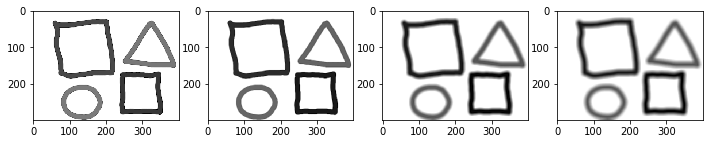

In [68]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.filters import convolve
%matplotlib inline
fig, axes = plt.subplots(1, 4, figsize=(12, 6))

img = cv2.imread('images/pic3.png', 0)
# mask 
mask3 = np.ones((3, 3), dtype=float)*(1/9)
out3 = convolve(img, mask3)

mask9 = np.ones((9, 9), dtype=float)*(1/(9*9))
out9 = convolve(img, mask9, cval=0)

mask12 = np.ones((12, 12), dtype=float)*(1/(12*12))
out12 = convolve(img, mask12, cval=0)
# plot
axes[0].imshow(img, cmap="gray")
axes[1].imshow(out3, cmap="gray")
axes[2].imshow(out9, cmap="gray")
axes[3].imshow(out12, cmap="gray")

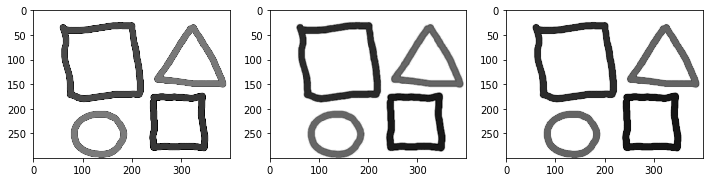

In [70]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.filters import convolve
%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

img = cv2.imread('images/pic3.png', 0)
# mask 
k = 3
wright_mask3 = np.array([[1,1,1],[1, 2, 1],[1, 1, 1]], dtype=float)*(1/((2*k+1)**2+1))
out3 = convolve(img, wright_mask3)
k = 3 # mask window size 
wright_mask3_ = np.array([[1,1,1],[1, 10, 1],[1, 1, 1]], dtype=float)*(1/((2*k+1)**2+9))
out3_ = convolve(img, wright_mask3_)

# plot
axes[0].imshow(img, cmap="gray")
axes[1].imshow(out3, cmap="gray")
axes[2].imshow(out3_, cmap="gray")

#### Sharpenning

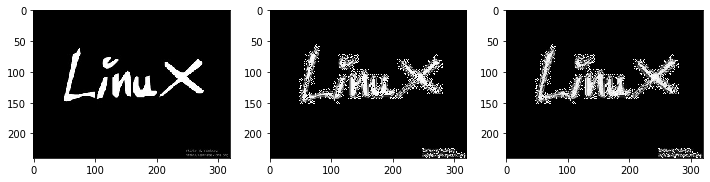

In [82]:
# Todo

import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.filters import convolve
%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

img = cv2.imread('images/LinuxLogo.jpg', 0)

# standard laplacian sharpenning mask
sharpen_mask = np.array([[1,-1,1],[-1, 4, -1],[1, -1, 1]], dtype=float)
out3 = convolve(img, sharpen_mask)
# High boost mask 
sharpen_mask2 = np.array([[1,-1,1],[-1, 8, -1],[1, -1, 1]], dtype=float)
out3_ = convolve(img, sharpen_mask2)

mask12 = np.ones((12, 12), dtype=float)*(1/(12*12))
out12 = convolve(img, mask12, cval=0)


mask3 = np.ones((3, 3), dtype=float)*(1/9)
blurr = convolve(img, mask3)
# plot
axes[0].imshow(img, cmap="gray")
axes[1].imshow(out3, cmap="gray")
axes[2].imshow(out3_, cmap="gray")

In [19]:
gaussian_2d_kernel((5,5), 1)


array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

np.pi


In [21]:
np.pi

3.141592653589793

In [50]:
m = log_kernel((5,5), 1.4) 

In [51]:
m

array([[  2,   1,   0,   1,   2],
       [  1,  -6, -12,  -6,   1],
       [  0, -12, -21, -12,   0],
       [  1,  -6, -12,  -6,   1],
       [  2,   1,   0,   1,   2]])